In [1]:
%matplotlib inline

from connect4.neural.nn_pytorch import evaluate
from connect4.neural.stats import CombinedStats

import pickle
import numpy as np
from scipy.special import softmax
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from visdom import Visdom

from laplotter import LossAccPlotter


# https://discuss.pytorch.org/t/output-of-resnet34-network-depends-on-the-batch-size/21647
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.manual_seed(999)
np.random.seed(0)

In [2]:
n_epocs = 10000
epochs_per_stats = 1
batch_size = 4096
test_size = 0.2
# learning_rate = 0.002 * (batch_size / 1024.0)
learning_rate = 0.01
momentum = 0.9

WORKING_DIR = '/home/richard/Downloads/nn/PSU_back/'

In [3]:
with open('/home/richard/data/connect4/7ply_boards.pkl', 'rb') as f:
    boards = pickle.load(f)
with open ('/home/richard/data/connect4/7ply_values.pkl', 'rb') as f:
    values = pickle.load(f)
with open('/home/richard/data/connect4/7ply_priors.pkl', 'rb') as f:
    priors = pickle.load(f)

priors = list(map(lambda x: x / np.sum(x) if np.sum(x) > 0.0 else np.zeros((7,)), priors))

board_train, board_test, value_train, value_test, prior_train, prior_test = train_test_split(boards, values, priors, test_size=test_size, shuffle=True)

In [ ]:
from connect4.neural.nn_pytorch import Connect4Dataset

train = Connect4Dataset(board_train, value_train, prior_train)
test = Connect4Dataset(board_test, value_test, prior_test)

train_gen = data.DataLoader(train, batch_size, shuffle=True)
test_gen = data.DataLoader(train, batch_size, shuffle=False)

Creating dataset with 22391 positions
Creating dataset with 5598 positions


In [ ]:
from connect4.neural.nn_pytorch import Net

net = Net()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

Net(
  (body): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): ResidualLayer(
        (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (batch_norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (batch_norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): LeakyReLU(negative_slope=0.01)
      )
      (1): ResidualLayer(
        (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (ba

In [ ]:
value_criterion = nn.MSELoss()
prior_criterion = nn.BCELoss()

# optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)
optimizer = optim.Adam(net.parameters())

epoch: 0
Average loss:  0.21271  Accuracy:  0.11697  Smallest:  0.37858  Largest:  0.57237  Average:  0.49557
Category, # Members, # Correct Predictions:  (0.0, 9903, 0)  (0.5, 2619, 2619)  (1.0, 9869, 0)
Average loss:  0.40620  Accuracy:  0.79894
Average loss:  0.21995  Accuracy:  0.11826  Smallest:  0.50177  Largest:  0.51380  Average:  0.50666
Category, # Members, # Correct Predictions:  (0.0, 829, 0)  (0.5, 226, 226)  (1.0, 856, 0)
Average loss:  0.40768  Accuracy:  0.80377


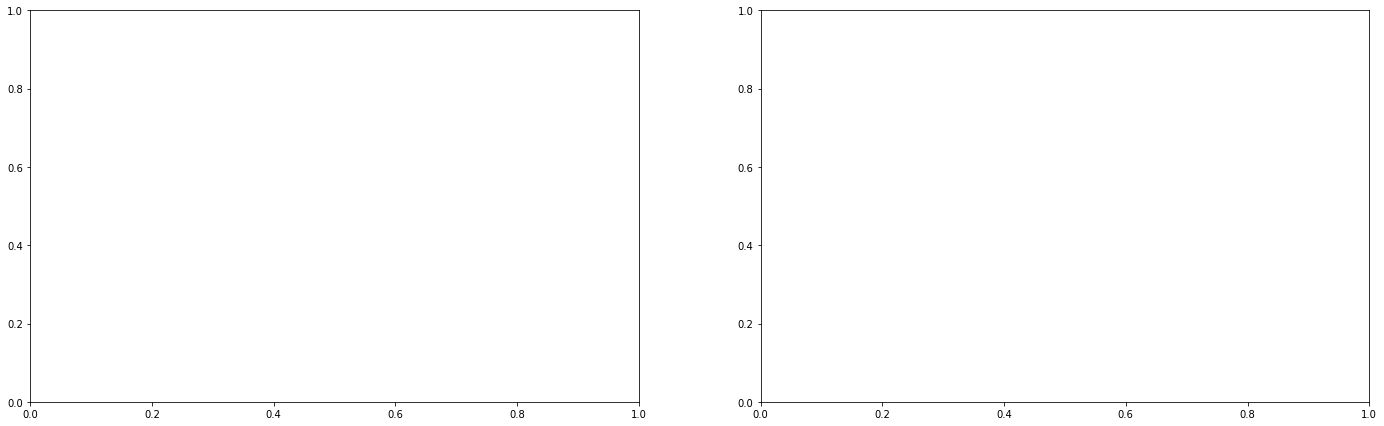

<Figure size 432x288 with 0 Axes>

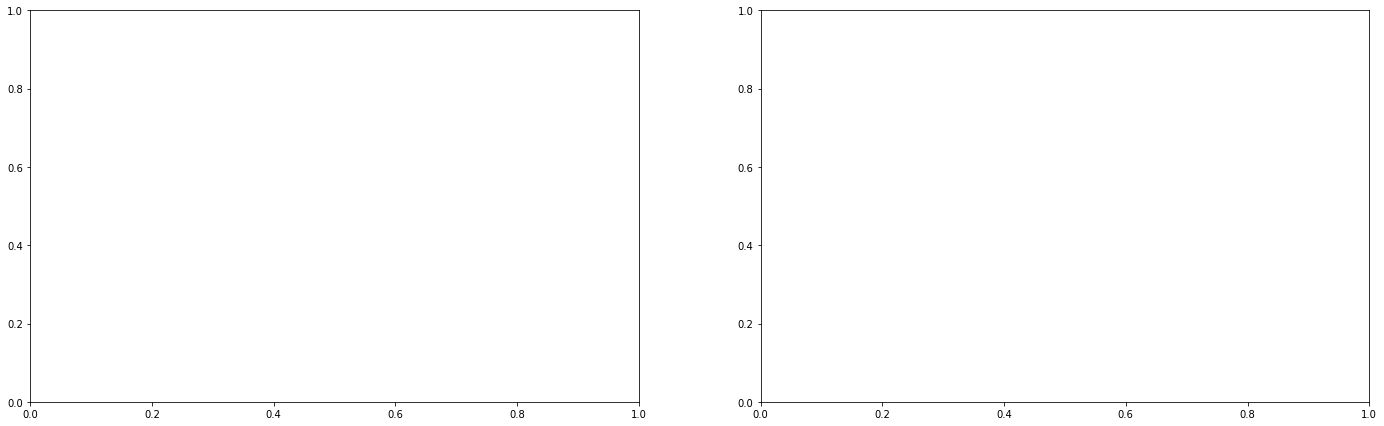

epoch: 1
Average loss:  0.17229  Accuracy:  0.19432  Smallest:  0.12522  Largest:  0.73170  Average:  0.47555
Category, # Members, # Correct Predictions:  (0.0, 9903, 1613)  (0.5, 2619, 2587)  (1.0, 9869, 151)
Average loss:  0.40416  Accuracy:  0.80836
Average loss:  0.21860  Accuracy:  0.11826  Smallest:  0.49873  Largest:  0.53955  Average:  0.51571
Category, # Members, # Correct Predictions:  (0.0, 829, 0)  (0.5, 226, 226)  (1.0, 856, 0)
Average loss:  0.40753  Accuracy:  0.80377
epoch: 2
Average loss:  0.11472  Accuracy:  0.59551  Smallest:  0.02135  Largest:  0.94494  Average:  0.46561
Category, # Members, # Correct Predictions:  (0.0, 9903, 6707)  (0.5, 2619, 1867)  (1.0, 9869, 4760)
Average loss:  0.40309  Accuracy:  0.80729
Average loss:  0.21351  Accuracy:  0.11826  Smallest:  0.47252  Largest:  0.60157  Average:  0.52753
Category, # Members, # Correct Predictions:  (0.0, 829, 0)  (0.5, 226, 226)  (1.0, 856, 0)
Average loss:  0.40734  Accuracy:  0.80377
epoch: 3
Average loss: 

epoch: 18
Average loss:  0.02653  Accuracy:  0.89366  Smallest:  0.00000  Largest:  0.99999  Average:  0.50151
Category, # Members, # Correct Predictions:  (0.0, 9903, 9559)  (0.5, 2619, 899)  (1.0, 9869, 9552)
Average loss:  0.38777  Accuracy:  0.86075
Average loss:  0.02953  Accuracy:  0.88226  Smallest:  0.00002  Largest:  0.99998  Average:  0.53034
Category, # Members, # Correct Predictions:  (0.0, 829, 775)  (0.5, 226, 76)  (1.0, 856, 835)
Average loss:  0.38509  Accuracy:  0.87703
epoch: 19
Average loss:  0.02553  Accuracy:  0.89540  Smallest:  0.00000  Largest:  0.99999  Average:  0.50204
Category, # Members, # Correct Predictions:  (0.0, 9903, 9589)  (0.5, 2619, 871)  (1.0, 9869, 9589)
Average loss:  0.38695  Accuracy:  0.86584
Average loss:  0.02896  Accuracy:  0.88121  Smallest:  0.00001  Largest:  0.99999  Average:  0.47780
Category, # Members, # Correct Predictions:  (0.0, 829, 815)  (0.5, 226, 59)  (1.0, 856, 810)
Average loss:  0.38443  Accuracy:  0.87598
epoch: 20
Averag

epoch: 35
Average loss:  0.01774  Accuracy:  0.91255  Smallest:  0.00000  Largest:  1.00000  Average:  0.49623
Category, # Members, # Correct Predictions:  (0.0, 9903, 9741)  (0.5, 2619, 998)  (1.0, 9869, 9694)
Average loss:  0.37771  Accuracy:  0.90536
Average loss:  0.01655  Accuracy:  0.92308  Smallest:  0.00000  Largest:  0.99998  Average:  0.51948
Category, # Members, # Correct Predictions:  (0.0, 829, 811)  (0.5, 226, 102)  (1.0, 856, 851)
Average loss:  0.37483  Accuracy:  0.91941
epoch: 36
Average loss:  0.01690  Accuracy:  0.91439  Smallest:  0.00000  Largest:  1.00000  Average:  0.49512
Category, # Members, # Correct Predictions:  (0.0, 9903, 9746)  (0.5, 2619, 1011)  (1.0, 9869, 9717)
Average loss:  0.37732  Accuracy:  0.90782
Average loss:  0.02349  Accuracy:  0.88854  Smallest:  0.00000  Largest:  0.99998  Average:  0.54722
Category, # Members, # Correct Predictions:  (0.0, 829, 772)  (0.5, 226, 75)  (1.0, 856, 851)
Average loss:  0.37493  Accuracy:  0.92203
epoch: 37
Aver

epoch: 52
Average loss:  0.01011  Accuracy:  0.94873  Smallest:  0.00000  Largest:  1.00000  Average:  0.50129
Category, # Members, # Correct Predictions:  (0.0, 9903, 9849)  (0.5, 2619, 1571)  (1.0, 9869, 9823)
Average loss:  0.36893  Accuracy:  0.93466
Average loss:  0.01101  Accuracy:  0.94244  Smallest:  0.00000  Largest:  1.00000  Average:  0.48878
Category, # Members, # Correct Predictions:  (0.0, 829, 826)  (0.5, 226, 124)  (1.0, 856, 851)
Average loss:  0.36599  Accuracy:  0.94349
epoch: 53
Average loss:  0.01032  Accuracy:  0.94489  Smallest:  0.00000  Largest:  1.00000  Average:  0.49913
Category, # Members, # Correct Predictions:  (0.0, 9903, 9862)  (0.5, 2619, 1482)  (1.0, 9869, 9813)
Average loss:  0.36839  Accuracy:  0.93618
Average loss:  0.01334  Accuracy:  0.92831  Smallest:  0.00000  Largest:  1.00000  Average:  0.48030
Category, # Members, # Correct Predictions:  (0.0, 829, 827)  (0.5, 226, 105)  (1.0, 856, 842)
Average loss:  0.36560  Accuracy:  0.94505
epoch: 54
Av

epoch: 69
Average loss:  0.00693  Accuracy:  0.96722  Smallest:  0.00000  Largest:  1.00000  Average:  0.49838
Category, # Members, # Correct Predictions:  (0.0, 9903, 9892)  (0.5, 2619, 1928)  (1.0, 9869, 9837)
Average loss:  0.36088  Accuracy:  0.95561
Average loss:  0.00690  Accuracy:  0.96860  Smallest:  0.00000  Largest:  1.00000  Average:  0.49988
Category, # Members, # Correct Predictions:  (0.0, 829, 829)  (0.5, 226, 168)  (1.0, 856, 854)
Average loss:  0.35804  Accuracy:  0.95971
epoch: 70
Average loss:  0.00805  Accuracy:  0.95806  Smallest:  0.00000  Largest:  1.00000  Average:  0.49956
Category, # Members, # Correct Predictions:  (0.0, 9903, 9874)  (0.5, 2619, 1745)  (1.0, 9869, 9833)
Average loss:  0.36040  Accuracy:  0.95574
Average loss:  0.01098  Accuracy:  0.93616  Smallest:  0.00000  Largest:  1.00000  Average:  0.47487
Category, # Members, # Correct Predictions:  (0.0, 829, 829)  (0.5, 226, 116)  (1.0, 856, 844)
Average loss:  0.35762  Accuracy:  0.95918
epoch: 71
Av

epoch: 86
Average loss:  0.00592  Accuracy:  0.97182  Smallest:  0.00000  Largest:  1.00000  Average:  0.49891
Category, # Members, # Correct Predictions:  (0.0, 9903, 9889)  (0.5, 2619, 2059)  (1.0, 9869, 9812)
Average loss:  0.35322  Accuracy:  0.96994
Average loss:  0.00552  Accuracy:  0.97698  Smallest:  0.00000  Largest:  1.00000  Average:  0.50550
Category, # Members, # Correct Predictions:  (0.0, 829, 829)  (0.5, 226, 187)  (1.0, 856, 851)
Average loss:  0.35079  Accuracy:  0.97122
epoch: 87
Average loss:  0.00582  Accuracy:  0.97244  Smallest:  0.00000  Largest:  1.00000  Average:  0.49821
Category, # Members, # Correct Predictions:  (0.0, 9903, 9894)  (0.5, 2619, 2075)  (1.0, 9869, 9805)
Average loss:  0.35256  Accuracy:  0.97124
Average loss:  0.01162  Accuracy:  0.92726  Smallest:  0.00000  Largest:  1.00000  Average:  0.53870
Category, # Members, # Correct Predictions:  (0.0, 829, 813)  (0.5, 226, 112)  (1.0, 856, 847)
Average loss:  0.35093  Accuracy:  0.97227
epoch: 88
Av

epoch: 103
Average loss:  0.00852  Accuracy:  0.95087  Smallest:  0.00000  Largest:  1.00000  Average:  0.49272
Category, # Members, # Correct Predictions:  (0.0, 9903, 9858)  (0.5, 2619, 1766)  (1.0, 9869, 9667)
Average loss:  0.34748  Accuracy:  0.97941
Average loss:  0.00749  Accuracy:  0.94558  Smallest:  0.00000  Largest:  1.00000  Average:  0.51251
Category, # Members, # Correct Predictions:  (0.0, 829, 827)  (0.5, 226, 155)  (1.0, 856, 825)
Average loss:  0.34626  Accuracy:  0.97698
epoch: 104
Average loss:  0.00777  Accuracy:  0.95395  Smallest:  0.00000  Largest:  1.00000  Average:  0.50303
Category, # Members, # Correct Predictions:  (0.0, 9903, 9854)  (0.5, 2619, 1855)  (1.0, 9869, 9651)
Average loss:  0.34715  Accuracy:  0.97932
Average loss:  0.00802  Accuracy:  0.95971  Smallest:  0.00000  Largest:  1.00000  Average:  0.49134
Category, # Members, # Correct Predictions:  (0.0, 829, 828)  (0.5, 226, 163)  (1.0, 856, 843)
Average loss:  0.34546  Accuracy:  0.98064
epoch: 105

In [ ]:
%%time
prior_loss_weight = 1

viz = Visdom()
value_plotter = LossAccPlotter(show_regressions=False, show_averages=False)
prior_plotter = LossAccPlotter(show_regressions=False, show_averages=False)

n = len(train_gen)
for epoch in range(n_epocs):
    net = net.train()
    
    train_stats = CombinedStats()
    
    for board, value, prior in train_gen:
        board, value, prior = board.to(device), value.to(device), prior.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        value_output, prior_output = net(board)
        assert value_output.shape == value.shape
        assert prior_output.shape == prior.shape
            
        value_loss = value_criterion(value_output, value)
        prior_loss = prior_criterion(prior_output, prior)
        loss = value_loss + prior_loss * prior_loss_weight

        loss.backward()
        optimizer.step()
        
        train_stats.update(value_output.cpu().detach().numpy(),
                           value.cpu().numpy(),
                           value_loss,
                           prior_output.cpu().detach().numpy(),
                           prior.cpu().numpy(),
                           prior_loss)
    
    net.eval()
    test_stats = evaluate(test_gen, net, device, value_criterion, prior_criterion)
    print("epoch: {}\n{}\n{}".format(epoch, train_stats, test_stats))
    value_plotter.add_values(epoch,
                             loss_train=train_stats.value_stats.loss, acc_train=train_stats.value_stats.accuracy,
                             loss_val=test_stats.value_stats.loss, acc_val=test_stats.value_stats.accuracy)
    prior_plotter.add_values(epoch,
                         loss_train=train_stats.prior_stats.loss, acc_train=train_stats.prior_stats.accuracy,
                         loss_val=test_stats.prior_stats.loss, acc_val=test_stats.prior_stats.accuracy)
    if epoch == 0:
        value_win = viz.matplot(value_plotter.fig)
        prior_win = viz.matplot(prior_plotter.fig)
    else:
        viz.matplot(value_plotter.fig, win=value_win)
        viz.matplot(prior_plotter.fig, win=prior_win)
            
print('Finished Training')